In [5]:
import pandas as pd

Stroke Prediction Dataset

In [3]:
#data = pd.read_csv("/Users/anastasiakurakova/Desktop/Data/stroke/stroke_train.csv")

In [4]:
len(data)

3927

Splitting the data into training and testing

In [7]:
#from sklearn.model_selection import train_test_split
#X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
#X_train
#X_train.to_csv("/Users/anastasiakurakova/Desktop/Data/diabetes_train.csv", encoding='utf-8', index=False)
#X_test.to_csv("/Users/anastasiakurakova/Desktop/Data/diabetes_test.csv", encoding='utf-8', index=False)

In [6]:
data = pd.read_csv("/Users/anastasiakurakova/Desktop/Data/stroke/stroke_train.csv")
X_test = pd.read_csv("/Users/anastasiakurakova/Desktop/Data/stroke/stroke_test.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,68302,Female,40.0,0,0,Yes,Private,Urban,65.77,31.2,never smoked,0
1,62716,Female,59.0,0,0,Yes,Self-employed,Urban,81.64,32.8,Unknown,0
2,46498,Female,57.0,0,0,Yes,Private,Urban,217.40,36.6,never smoked,0
3,4148,Male,81.0,0,0,Yes,Self-employed,Urban,71.18,23.9,formerly smoked,0
4,35315,Male,65.0,0,0,Yes,Self-employed,Urban,95.88,28.5,never smoked,0
5,32610,Female,11.0,0,0,No,children,Urban,94.89,27.5,never smoked,0
6,50763,Male,42.0,0,0,Yes,Govt_job,Urban,58.35,24.3,never smoked,0
7,68291,Male,76.0,0,0,Yes,Private,Urban,147.50,28.7,Unknown,0
8,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
9,7979,Female,26.0,0,0,No,Private,Rural,69.77,23.2,never smoked,0


CTGAN is a part of Synthetic Data Vault.

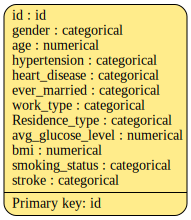

In [7]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)
metadata.visualize()

In [8]:
%%time
ctgan = CTGANSynthesizer(metadata, epochs=1000, verbose=True)
ctgan.fit(data)
loss_values = ctgan.get_loss_values()


Gen. (-1.55) | Discrim. (0.32): 100%|██████████| 1000/1000 [03:40<00:00,  4.54it/s]

CPU times: user 3min 19s, sys: 1min 38s, total: 4min 58s
Wall time: 3min 52s


In [7]:
import plotly.express as px

loss_values_reformatted = pd.melt(
    loss_values,
    id_vars=['Epoch'],
    var_name='Loss Type'
)

fig = px.line(loss_values_reformatted, x="Epoch", y="value", color="Loss Type", title='Epoch vs. Loss')
fig.show()

In [9]:
# Sample Data equal to the size of the training set
samples = ctgan.sample(len(data))
samples.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,3927,Male,30.38,0,0,No,Private,Urban,115.93,19.9,Unknown,0
1,3928,Male,33.89,0,0,No,Private,Rural,84.97,28.8,never smoked,0
2,3929,Female,20.38,0,0,No,Private,Rural,123.11,20.3,smokes,0
3,3930,Female,49.91,0,0,Yes,Private,Urban,75.18,33.0,Unknown,1
4,3931,Male,43.14,0,0,Yes,Private,Urban,85.38,29.7,Unknown,1
5,3932,Male,73.52,0,0,Yes,Self-employed,Rural,90.76,21.1,never smoked,0
6,3933,Male,35.55,0,0,Yes,Private,Urban,91.84,27.2,Unknown,0
7,3934,Female,29.10,0,0,Yes,Private,Rural,64.41,28.1,formerly smoked,0
8,3935,Male,55.29,0,0,Yes,Govt_job,Rural,72.72,40.8,never smoked,0
9,3936,Male,11.69,0,0,Yes,children,Urban,62.29,18.8,Unknown,0


In [10]:
#samples.to_csv("/Users/anastasiakurakova/Desktop/Data/stroke_TSTR_ctgan.csv", encoding='utf-8', index=False)

In [10]:
# Checking for duplicates between original and synthetic datasets

common_duplicates = pd.merge(X_test, samples, how='inner')
new = common_duplicates.drop_duplicates()
# Print the common duplicate rows
print("Common Duplicate Rows:")
print(common_duplicates)
print(new)

Common Duplicate Rows:
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


### Using Synthetic Data Vault Library for Evaluation

In [3]:
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=X_test,
    synthetic_data=samples,
    metadata=metadata
)

quality_report = evaluate_quality(
    X_test,
    samples,
    metadata
)

NameError: name 'X_test' is not defined

In [12]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,gender,TVComplement,0.869004
1,age,KSComplement,0.933204
2,hypertension,TVComplement,0.985463
3,heart_disease,TVComplement,0.949820
4,ever_married,TVComplement,0.994742
5,work_type,TVComplement,0.973945
6,Residence_type,TVComplement,0.946656
7,avg_glucose_level,KSComplement,0.890438
8,bmi,KSComplement,0.964984
9,smoking_status,TVComplement,0.958029


### Calculate Range Coverage and KSComplement for Numerical Variables

In [16]:

from sdmetrics.single_column import RangeCoverage, KSComplement
for i in ['bmi','avg_glucose_level']:
  range_cov = RangeCoverage.compute(
      real_data=X_test[i],
      synthetic_data=samples[i]
  )
  ks = KSComplement.compute(
      real_data=X_test[i],
      synthetic_data=samples[i]
  )
  print(f"Range coverage for {i} is: {range_cov}")
  print(f"KSComplement for {i} is: {ks}")

Range coverage for bmi is: 0.6334478808705614
KSComplement for bmi is: 0.9649844385078601
Range coverage for avg_glucose_level is: 0.9929415086348877
KSComplement for avg_glucose_level is: 0.8904383823516446


### Calculate Category Coverage and TVComplement for Categorical Variables

In [18]:

from sdmetrics.single_column import CategoryCoverage, TVComplement
for i in ['work_type','smoking_status']:
  cat_cov = CategoryCoverage.compute(
    real_data=X_test[i],
    synthetic_data=samples[i]
  )
  tv = TVComplement.compute(
      real_data=X_test[i],
      synthetic_data=samples[i]
  )
  print(f"Category coverage for {i} is: {cat_cov}")
  print(f"TVComplement for {i} is: {tv}")

Category coverage for work_type is: 1.0
TVComplement for work_type is: 0.9739453270662088
Category coverage for smoking_status is: 1.0
TVComplement for smoking_status is: 0.9580285733993653


###
Using Table Evaluator For Evaluation

(982, 12) (3927, 12)


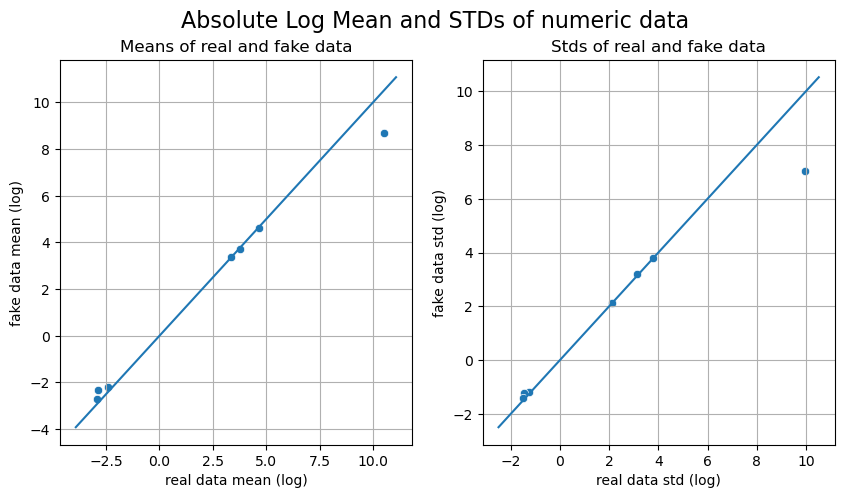

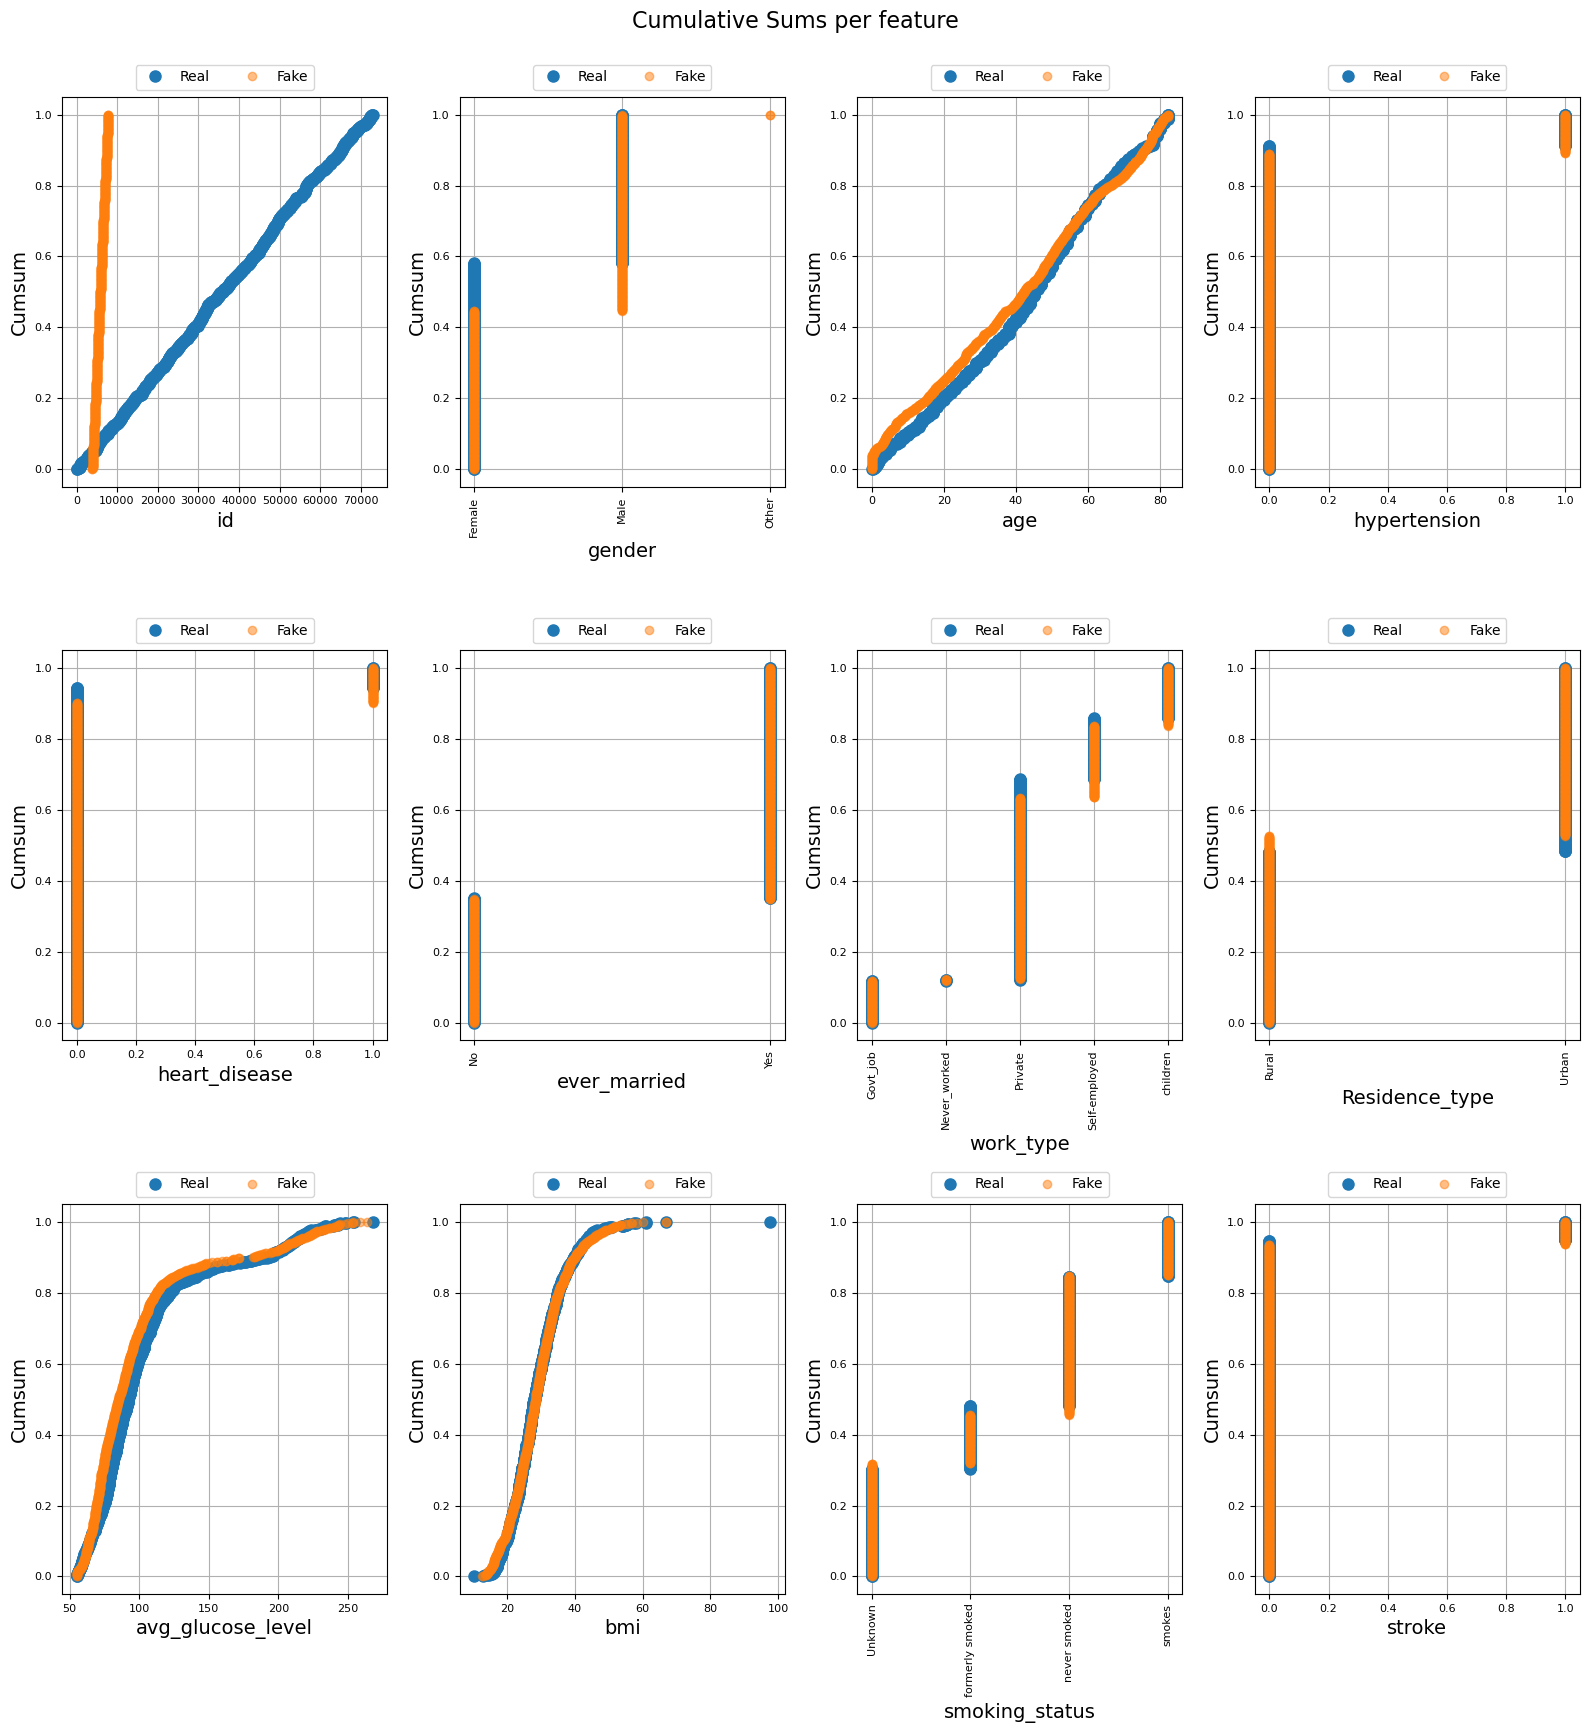

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:182: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:182: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:182: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:182: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/anastasiakurakova/min

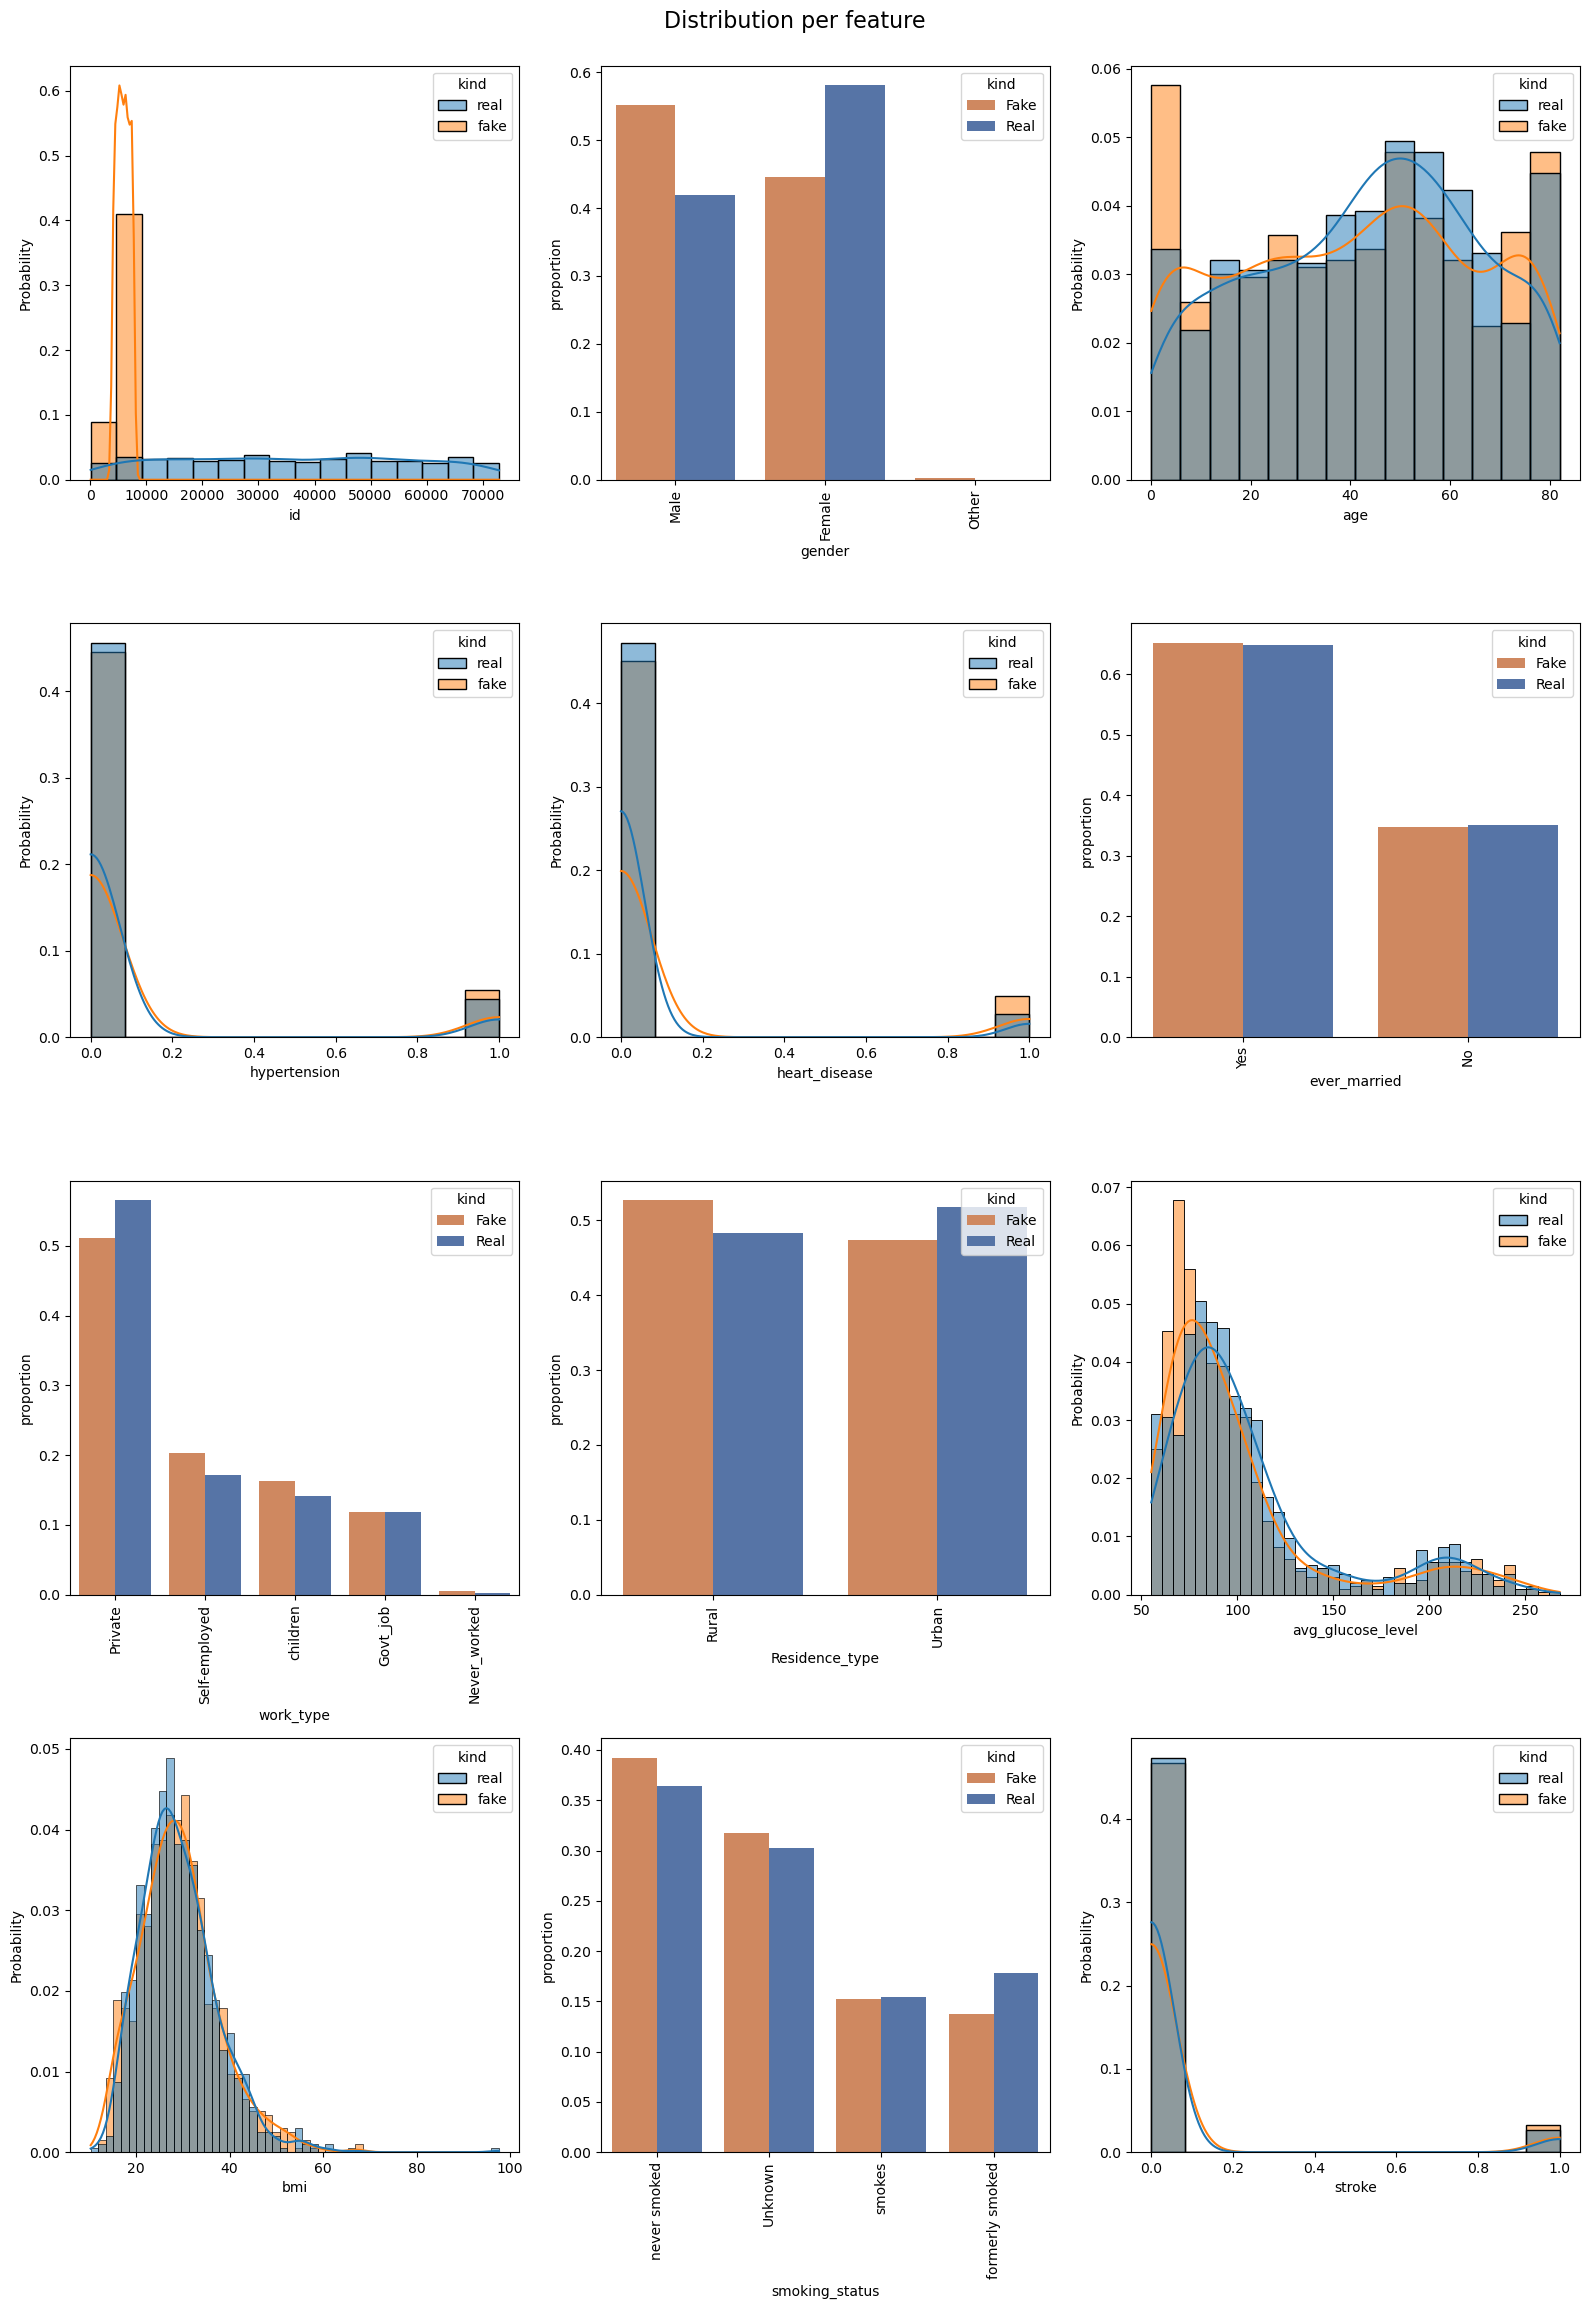

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:705: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython

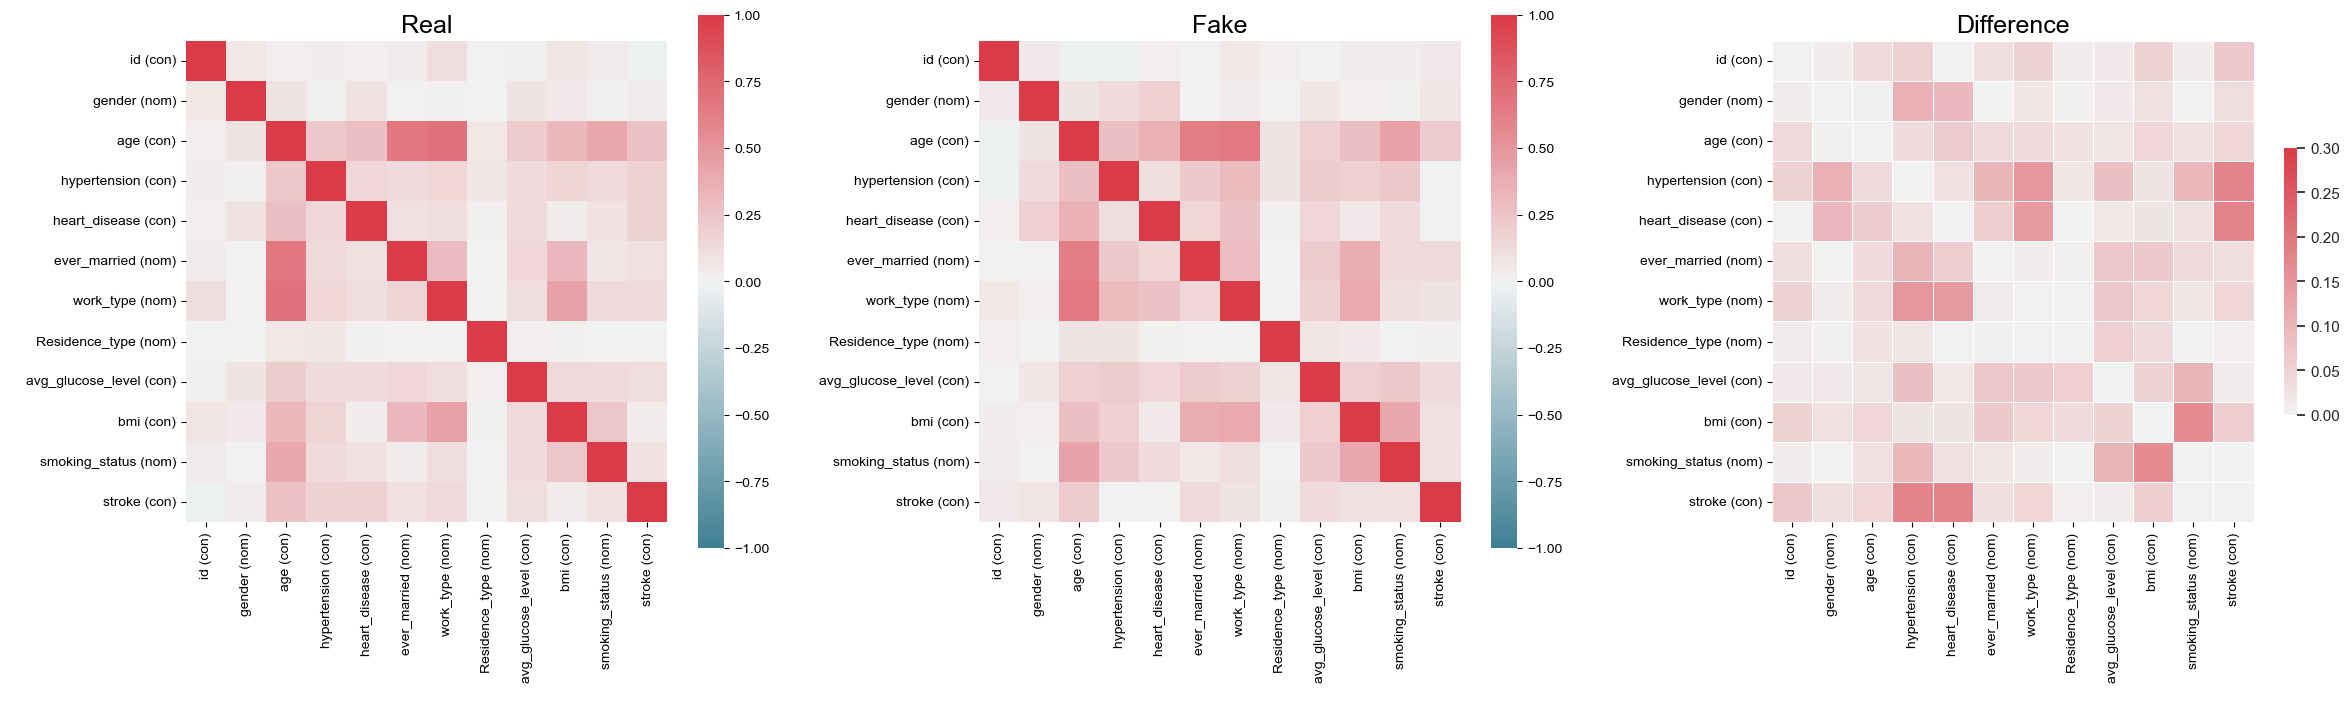

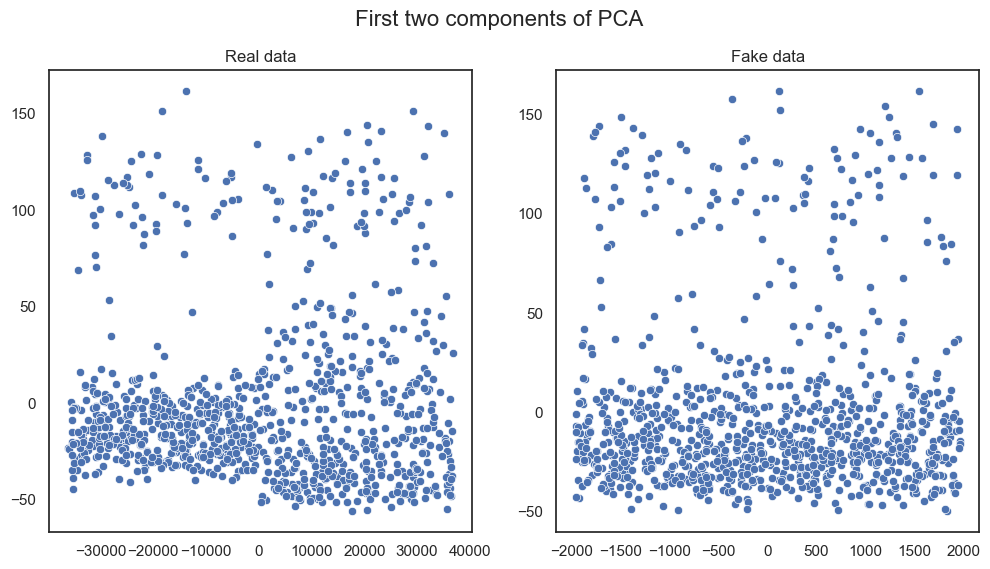

In [13]:
from table_evaluator import TableEvaluator
print(X_test.shape,samples.shape)
table_evaluator = TableEvaluator(X_test,samples)
table_evaluator.visual_evaluation()


In [14]:
table_evaluator.evaluate(target_col='smoking_status')

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:705: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.3706   0.3959              0.2086
DecisionTreeClassifier_real   0.4416   0.3350              0.2313
LogisticRegression_fake       0.4569   0.4772              0.6148
LogisticRegression_real       0.4721   0.3604              0.2390
MLPClassifier_fake            0.1320   0.1675              0.0000
MLPClassifier_real            0.1320   0.1421              0.0000
RandomForestClassifier_fake   0.3452   0.3858              0.2313
RandomForestClassifier_real   0.4721   0.3959              0.3046

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.4087
nearest neighbor std                     0.4123

Miscellaneous results:
                                  Result
Column Cor

In [22]:
# Wasserstein Distance
from scipy.stats import wasserstein_distance
wasserstein_distances = {}
for column in X_test.columns[8:10]:
    wasserstein_dist = wasserstein_distance(X_test[column], samples[column])
    wasserstein_distances[column] = wasserstein_dist
# Print Wasserstein distances for each feature
for column, distance in wasserstein_distances.items():
    print(f'For Testing data vs Synthetic Data {column}: {distance}')
wasserstein_distances = {}
for column in X_test.columns[8:10]:
    wasserstein_dist = wasserstein_distance(X_test[column], data[column])
    wasserstein_distances[column] = wasserstein_dist
# Print Wasserstein distances for each feature
for column, distance in wasserstein_distances.items():
    print(f'Comparing Testing data and Training Data {column}: {distance}')


For Testing data vs Synthetic Data avg_glucose_level: 4.951773348850742
For Testing data vs Synthetic Data bmi: 0.45411193175659326
Comparing Testing data and Training Data avg_glucose_level: 0.9210892240621485
Comparing Testing data and Training Data bmi: 0.4357661227794204


In [23]:
# Calculate KL Divergence for each feature
from scipy.stats import entropy
kl_divergences = {}
for column in X_test.columns[8:10]:
    kl_divergence = entropy(X_test[column], samples[column][:len(X_test)])
    kl_divergences[column] = kl_divergence

# Print KL Divergences for each feature
for column, divergence in kl_divergences.items():
    print(f'Testing Data vs Synthetic Data {column}: {divergence}')

Testing Data vs Synthetic Data avg_glucose_level: 0.15318376152119387
Testing Data vs Synthetic Data bmi: 0.0766552212373097


In [24]:
# Calculate KL Divergence for each feature
from scipy.stats import entropy
kl_divergences = {}
for column in X_test.columns[8:10]:
    kl_divergence = entropy(X_test[column], data[column][:len(X_test)])
    kl_divergences[column] = kl_divergence

# Print KL Divergences for each feature
for column, divergence in kl_divergences.items():
    print(f' Testing Data vs Training Data {column}: {divergence}')

 Testing Data vs Training Data avg_glucose_level: 0.14953756572088872
 Testing Data vs Training Data bmi: 0.07350233765670086


In [19]:
# Check for MSE and r2 (Didn't Use those in the paper)
from sklearn.metrics import mean_squared_error, r2_score
# Calculate MSE between testing_data and real_data
mse_real = mean_squared_error(X_test['bmi'], data[:len(X_test)]['bmi'])
print("MSE between Testing Data and Real Data:", mse_real)

# Calculate MSE between testing_data and synthetic_data
mse_synthetic = mean_squared_error(X_test['bmi'], samples[:len(X_test)]['bmi'])
print("MSE between Testing Data and Synthetic Data:", mse_synthetic)

# Calculate R-squared (R2) score
r2 = r2_score(X_test['bmi'], data[:len(X_test)]['bmi'])
print("R-squared Score (between Testing Data and Real Data):", r2)

r2 = r2_score(X_test['bmi'], samples[:len(X_test)]['bmi'])
print("R-squared Score (between Testing Data and Synthetic Data):", r2)

MSE between Testing Data and Real Data: 128.20159877800407
MSE between Testing Data and Synthetic Data: 137.27857433808558
R-squared Score (between Testing Data and Real Data): -0.8731813259365859
R-squared Score (between Testing Data and Synthetic Data): -1.0058069817567588
